In [1]:
import numpy as np
import pandas as pd
import math
import pyeto
import matplotlib.pyplot as plt
import proplot as pplt

import warnings 
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'proplot'

In [ ]:
# Variáveis para o gráfico do BH Mensal
meses =  ('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez')
prp_mes = (58, 78, 149, 242, 273, 216, 207, 101, 95, 72, 47, 57)
etp_mes = (156.7, 141.6, 155.8, 139.4, 126.3, 105.9, 101.7, 101.5, 109.5, 129.7, 132.1, 144.3)
etr_mes = (63.4, 79.5, 149.1, 139.4, 126.3, 105.9, 101.7, 101.5, 108.5, 109.7, 74.7, 69.0)
def_mes = (-93.3, -62.1, -6.7, 0, 0, 0, 0, 0, -1.08, -20.02, -57.45, -75.34)
exc_mes = (0, 0, 0, 4.17, 146.7, 110.01, 105.33, 0, 0, 0, 0, 0)
retirada = (-98.69, -63.63, -6.79, 0, 0, 0, 0, -0.51, -14.55, -57.77, -85.12, -87.34)
reposicao = (0, 0, 0, 102.58, 0, 0, 0, 0, 0, 0, 0, 0)

In [ ]:
ARM_anterior = 100
CAD = 100

In [ ]:
# definir a temperatura
temp = float(input('Insira a temperatura média: '))

In [ ]:
# definir a Precipitação
P_mm = float(input('Insira a precipitação: '))

In [ ]:
# definir a Evapotranspiração Potencial
EP = float(input('Insira a evapotranspiração: '))

In [ ]:
# definir o negativo acumulado anterior
neg_acum_anterior = 0

In [ ]:
# P-EP
P_EP = P_mm - EP
print(P_EP)

-10.0


In [ ]:
# neg acum
neg_acum = 100 * log(P_EP / 100) if P_EP > 0 else (P_EP + neg_acum_anterior) if P_EP < 0 else neg_acum_anterior
print(neg_acum)

-10.0


In [ ]:
# Calcular o Negativo acumulado (Neg Acum) e o armazenamento (ARM)
#def calcular_NAc_ARM(P, ETo, ARM_anterior, CAD):
#    if P - ETo < 0:
#        NAc += P - ETo
#        ARM = CAD * math.exp(NAc / CAD)
#    else:
#        ARM = ARM_anterior + (P - ETo)
#        NAc = CAD * math.log(ARM / CAD)
#    
#    return NAc, ARM

#resultado_NAc, resultado_ARM = calcular_NAc_ARM(P_mm, EP, ARM_anterior, CAD)
#print("Resultado NAc:", resultado_NAc)
#print("Resultado ARM:", resultado_ARM)

# Calcular o Negativo acumulado (Neg Acum) e o armazenamento (ARM)
def calcular_NAc_ARM(P, ETo, ARM, CAD):
    print(P, ETo, ARM_anterior, CAD)
    if P - ETo < 0:
        NAc += P - ETo
        ARM = CAD * math.exp(NAc / CAD)
        aux = ARM
    else:
        if ((P - ETo) + ARM) > 100:
            ARM = 100
            NAc = 0
            aux = ARM
        elif ((P - ETo) + ARM) < 100:
            ARM = aux + (P - ETo)
            NAc = CAD * math.log(ARM / CAD)
            aux = ARM
    return NAc, ARM

resultado_NAc, resultado_ARM = calcular_NAc_ARM(P_mm, EP, ARM_anterior, CAD)
print("Resultado NAc:", resultado_NAc)
print("Resultado ARM:", resultado_ARM)

120.0 130.0 100 100


UnboundLocalError: local variable 'NAc' referenced before assignment

In [ ]:
# Cacular a Alteração (ALT)
Alt = resultado_ARM - ARM_anterior
print('Resultado Alteração:', Alt)

NameError: name 'resultado_ARM' is not defined

In [ ]:
# Calcular Evapotranspiração Real
def calcular_ETR(P_mm, EP, Alt):
    if P_mm - EP < 0:
        ETR = P_mm + abs(Alt)
    else:
        ETR = EP
    return ETR

resultado_ETR = calcular_ETR(P_mm, EP, Alt)
print("Resultado ETR:", resultado_ETR)

Resultado ETR: 132.78162279383528


In [ ]:
# Calcular a Deficiência hídrica (quanto o sistema solo-planta deixou de evapotranspirar)
def calcular_DEF(EP, ETR):
    DEF = EP - resultado_ETR
    return DEF

resultado_DEF = calcular_DEF(EP, resultado_ETR)
print('Resultado Deficiência:', resultado_DEF)

Resultado Deficiência: 8.618377206164723


In [ ]:
# Calcular o Excedente hídrico
def calcular_excedente_hidrico(resultado_ARM, P_EP, Alt):
    if resultado_ARM < 100:
        EXC = 0
    elif resultado_ARM == 100:
        EXC = P_EP - Alt
    return EXC

resultado_EXC = calcular_excedente_hidrico(resultado_ARM, P_EP, Alt)
print("Resultado Excedente Hídrico:", resultado_EXC)

Resultado Excedente Hídrico: 0


C:\Users\pedro.pantoja\AppData\Local\Temp\ipykernel_15812\58698293.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(meses, fontsize=20)


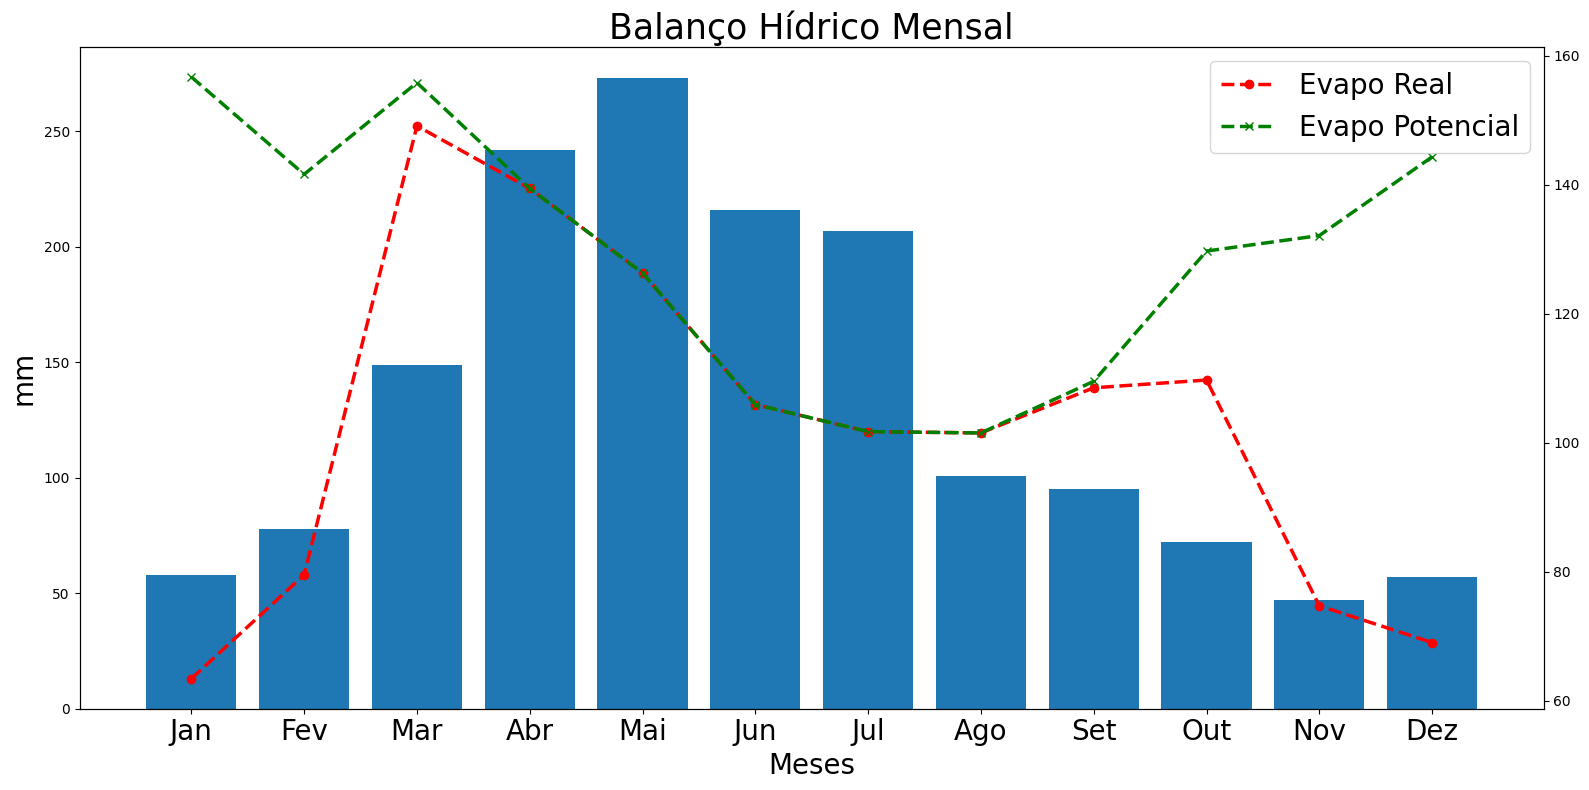

In [ ]:
# Gráfico do BH
fig, ax1 = plt.subplots(figsize=(16, 8))

# gráfico em barra
ax1.bar(meses, prp_mes, label='Precipitação')

# Criar um segundo eixo compartilhando o mesmo eixo x
ax2 = ax1.twinx()

# gráfico em linha
ax2.plot(etr_mes, '--', color='Red', marker='o', linewidth = 2.5, label='Evapo Real')
ax2.plot(etp_mes, '--', color='Green', marker='x', linewidth = 2.5, label='Evapo Potencial')

# config grafico
ax1.set_xticklabels(meses, fontsize=20)
ax1.set_xlabel('Meses', fontsize=20)
ax1.set_ylabel('mm', fontsize=20)
ax2.legend(loc='upper right', fontsize=20)

# Configurar o título e exibir o gráfico
plt.title('Balanço Hídrico Mensal', fontsize=25)
fig.tight_layout()

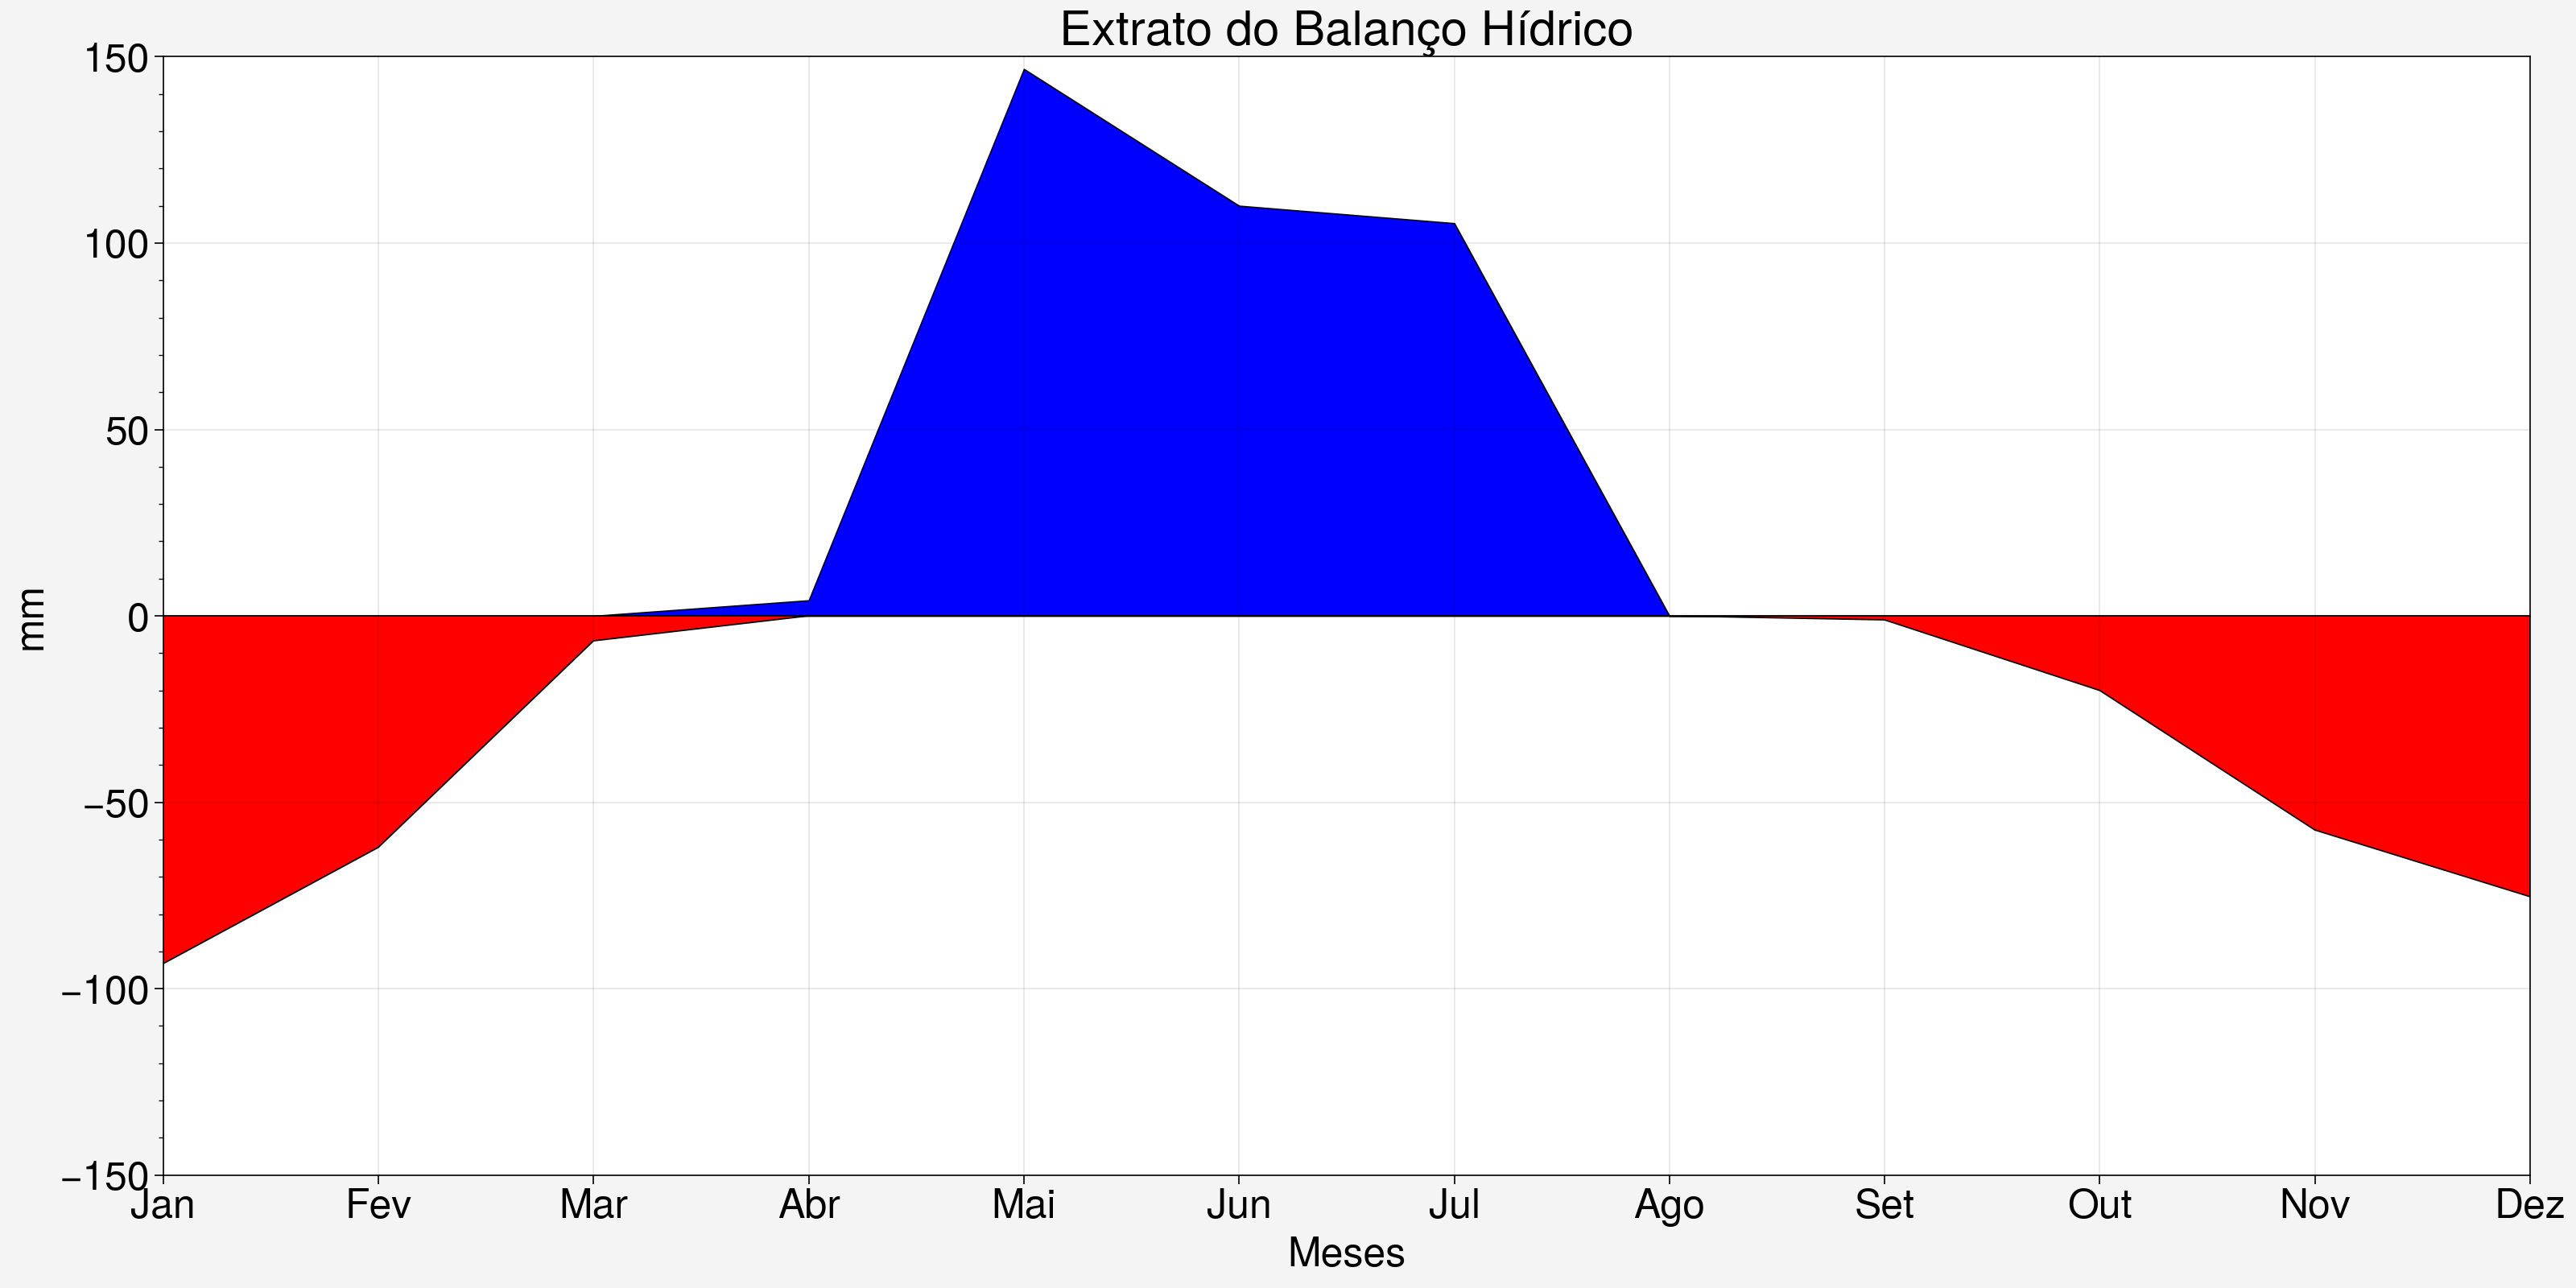

In [ ]:
fig, ax = pplt.subplots(figsize=(16, 8), tight=True)

ax.area(meses, exc_mes, negpos=True, negcolor='red', poscolor='blue', label='Excedente', edgecolor='k')
ax.area(meses, def_mes, negpos=True, negcolor='red', poscolor='blue', label='Deficit', edgecolor='k')

ax.format(title='Extrato do Balanço Hídrico', small='25px', large='30px',
          ylim=(-150, 150), xlabel='Meses', ylabel='mm')


pplt.show()

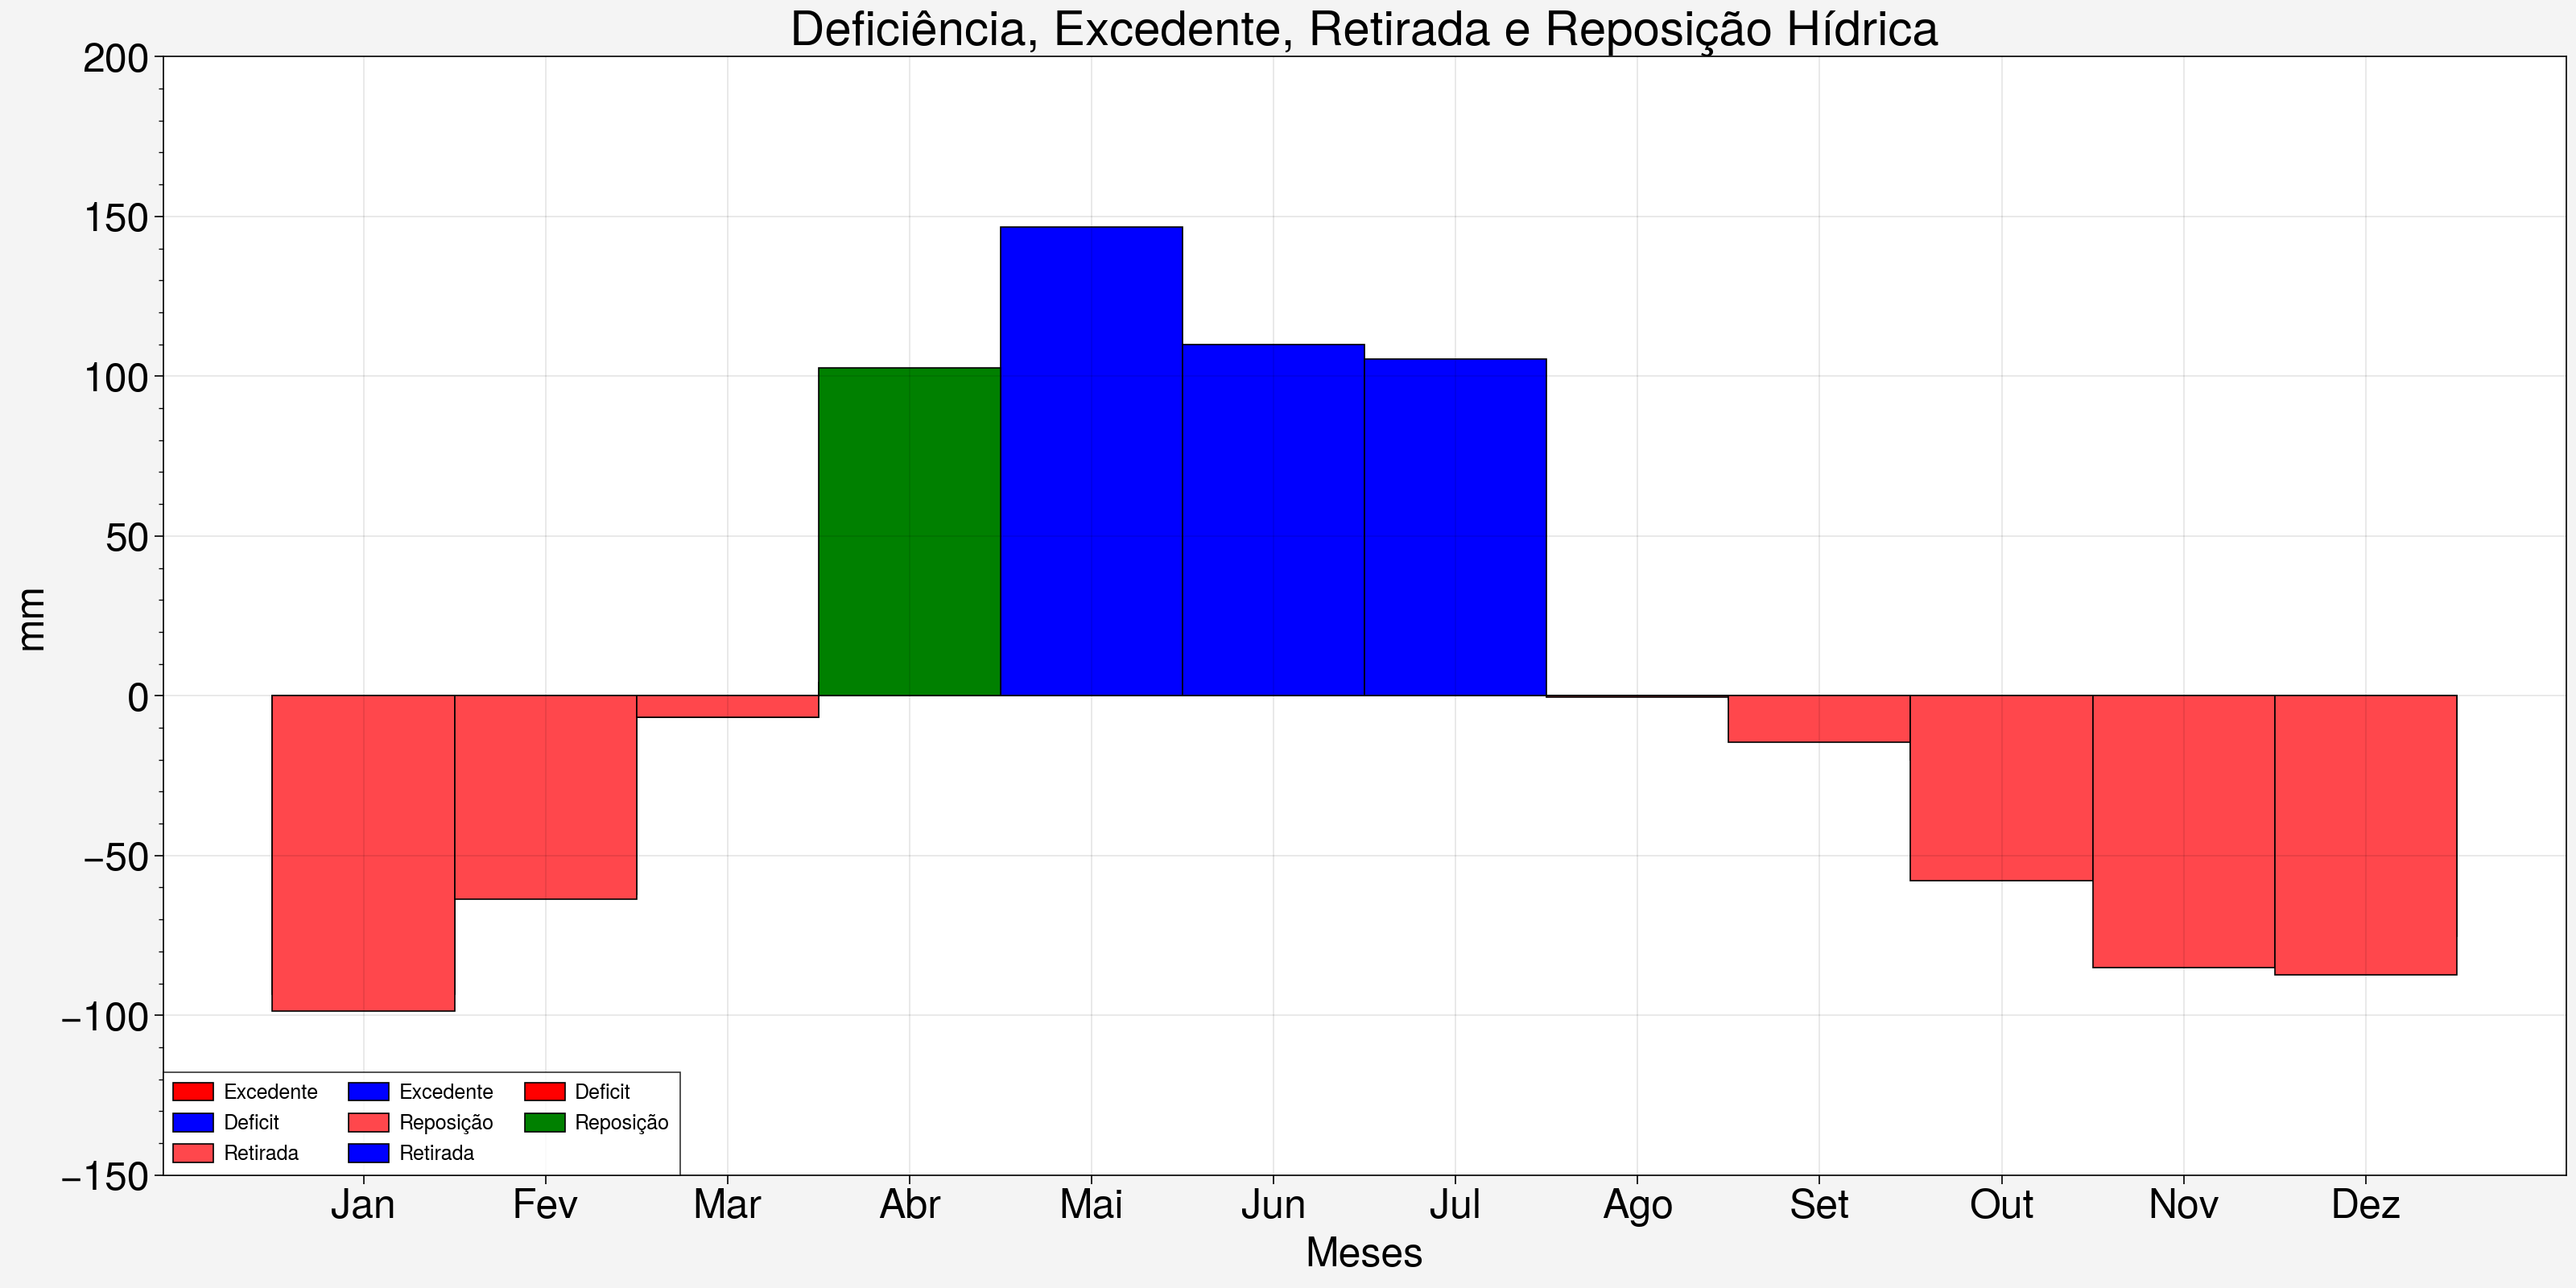

In [ ]:
fig, ax = pplt.subplots(figsize=(16, 8), tight=True)

ax.bar(meses, exc_mes, negpos=True, negcolor='red', poscolor='blue', label='Excedente', edgecolor='k', width=1)
ax.bar(meses, def_mes, negpos=True, negcolor='red', poscolor='blue', label='Deficit', edgecolor='k', width=1)
ax.bar(meses, reposicao, negpos=True, negcolor='light red', poscolor='green', label='Reposição', edgecolor='k', width=1)
ax.bar(meses, retirada, negpos=True, negcolor='light red', poscolor='blue', label='Retirada', edgecolor='k', width=1)

ax.format(title='Deficiência, Excedente, Retirada e Reposição Hídrica', small='25px', large='30px',
          ylim=(-150, 200), xlabel='Meses', ylabel='mm')

ax.legend(frameon=True)

pplt.show()

In [ ]:
print(reposicao)

(0, 0, 0, 102.58, 146.7, 110.01, 105.33, 0, 0, 0, 0, 0)


In [ ]:
# Calcular o Negativo acumulado (Neg Acum) e o armazenamento (ARM)
def calcular_NAc_ARM(P, ETo, ARM, CAD):
    print(P, ETo, ARM_anterior, CAD)
    if P - ETo < 0:
        NAc += P - ETo
        ARM = CAD * math.exp(NAc / CAD)
        aux = ARM
    else:
        if ((P - ETo) + ARM) > 100:
            ARM = 100
            NAc = 0
            aux = ARM
        elif ((P - ETo) + ARM) < 100:
            ARM = aux + (P - ETo)
            NAc = CAD * math.log(ARM / CAD)
            aux = ARM
    return NAc, ARM

resultado_NAc, resultado_ARM = calcular_NAc_ARM(P_mm, EP, ARM_anterior, CAD)
print("Resultado NAc:", resultado_NAc)
print("Resultado ARM:", resultado_ARM)